# Data Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
response = pd.read_csv("../final_data/train_outcome.csv")
response.tail()

,id,outcome
7084,7085,1
7085,7086,1
7086,7087,1
7087,7088,0
7088,7089,0


In [3]:
data = pd.read_csv("../trainData.csv")
data = data.iloc[:,:-1]
data.tail()

,RecordID,Age,Gender,AdmissionType,ALP_mean,ALP_max,ALP_min,ALP_range,ALP_changeStoF,ALP_numTest,...,noLabel_min,noLabel_range,noLabel_changeStoF,noLabel_numTest,pH_mean,pH_max,pH_min,pH_range,pH_changeStoF,pH_numTest
7084,7085,65,0,3,327.213,523.99,218.71,305.28,305.28,3.0,...,NaN,NaN,NaN,NaN,9.56908,7.42,7.16,0.26,0.21,13.0
7085,7086,65,1,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,15.68350,7.43,7.37,0.06,0.02,10.0
7086,7087,71,1,1,21.180,21.18,21.18,0.00,0.00,1.0,...,NaN,NaN,NaN,NaN,12.07170,7.45,7.20,0.25,0.16,18.0
7087,7088,73,1,2,67.710,67.71,67.71,0.00,0.00,1.0,...,NaN,NaN,NaN,NaN,19.76160,7.45,7.35,0.10,-0.08,6.0
7088,7089,37,0,4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Splitting Data into Training and Testing sets

In [4]:
trainIndicies = np.genfromtxt("../trainInd.txt") - 1
trainIndicies

array([4101., 6712., 3157., ..., 1767., 6283., 3952.])

In [5]:
X_train, y_train = data.iloc[trainIndicies,:].sort_index(), response.iloc[trainIndicies,:].sort_index()

In [6]:
X_test, y_test = data.drop(trainIndicies), response.drop(trainIndicies)

In [7]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(4962, 232) (4962, 2) (2127, 232) (2127, 2)


# EDA for Splitting by `AdmissionType`

In [8]:
X_train = X_train.set_index(["AdmissionType", "RecordID"]).sort_index()
X_train.head()

Age  Gender  ALP_mean  ALP_max  ALP_min  ALP_range  \
AdmissionType RecordID                                                       
1             17         40       0    85.515    86.25    84.78       1.47   
              31         47       1    88.020    88.02    88.02       0.00   
              34         57       1   100.700   100.70   100.70       0.00   
              35         68       1       NaN      NaN      NaN        NaN   
              44         68       1       NaN      NaN      NaN        NaN   

                        ALP_changeStoF  ALP_numTest  ALT_mean  ALT_max  ...  \
AdmissionType RecordID                                                  ...   
1             17                 -1.47          2.0   159.225    73.71  ...   
              31                  0.00          1.0   236.530   148.51  ...   
              34                  0.00          1.0   110.870    10.17  ...   
              35                   NaN          NaN       NaN      NaN  ...   
              44                   NaN          NaN       NaN      NaN  ...   

                        noLabel_min  noLabel_range  noLabel_changeStoF  \
AdmissionType RecordID                                                   
1             17                3.4            0.0                 0.0   
              31                NaN            NaN                 NaN   
              34                NaN            NaN                 NaN   
              35                NaN            NaN                 NaN   
              44                NaN            NaN                 NaN   

                        noLabel_numTest  pH_mean  pH_max  pH_min  pH_range  \
AdmissionType RecordID                                                       
1             17                    1.0  16.7066    7.49    7.47      0.02   
              31                    NaN  17.6505    7.47    7.38      0.09   
              34                    NaN  40.0480    7.37    7.35      0.02   
              35                    NaN      NaN     NaN     NaN       NaN   
              44                    NaN      NaN     NaN     NaN       NaN   

                        pH_changeStoF  pH_numTest  
AdmissionType RecordID                             
1             17                 0.00         5.0  
              31                -0.03         7.0  
              34                -0.02         3.0  
              35                  NaN         NaN  
              44                  NaN         NaN  

[5 rows x 230 columns]

### Checking for Columns with all `NaN` for Each `AdmissionType`  

In [9]:
## Getting percent NaN 
testNames = ["ALP", "ALT", "AST","Albumin","BUN","Bilirubin",
             "Cholesterol","Creatinine","DiasABP","FiO2","GCS",
             "Glucose","HCO3","HCT","HR","K","Lactate","MAP",
             "MechVent","Mg","NIDiasABP","NIMAP","NISysABP","Na",
             "PaCO2","PaO2","Platelets","RespRate","SAPS","SaO2",
             "SysABP","Temp","TroponinI","TroponinT","Urine","WBC",
             "noLabel","pH"]

cols = X_train.columns[2:]
colNum = 0
percents = []
for i in range(1, 5):
    percents.append([])
    colNum = 0
    for test in testNames:
        p = X_train.loc[i,cols[colNum]].isna().sum() / X_train.loc[i,cols[colNum]].shape[0] # number of NaN / total
        percents[i - 1].append(p)
        colNum += 6            

In [10]:
AdmissionType1 = pd.DataFrame(np.array(percents[0])*100, index = testNames).sort_values(by = 0, ascending=False)
AdmissionType2 = pd.DataFrame(np.array(percents[1])*100, index = testNames).sort_values(by = 0, ascending=False)
AdmissionType3 = pd.DataFrame(np.array(percents[2])*100, index = testNames).sort_values(by = 0, ascending=False)
AdmissionType4 = pd.DataFrame(np.array(percents[3])*100, index = testNames).sort_values(by = 0, ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 <a list of 38 Text xticklabel objects>)

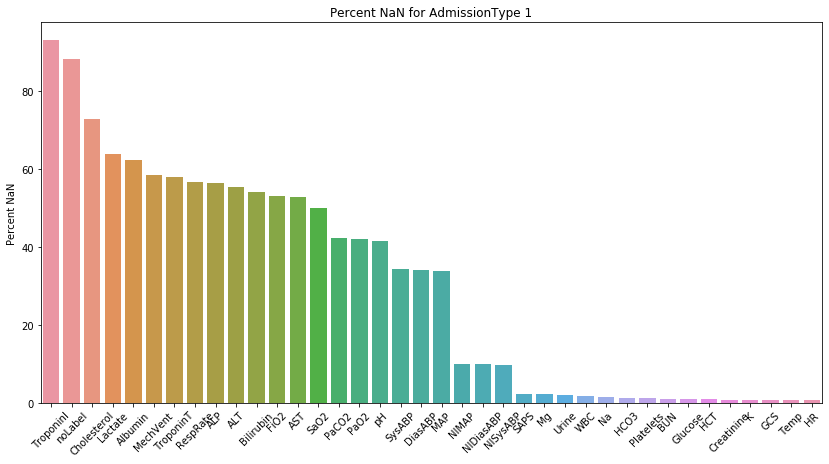

In [11]:
plt.figure(figsize=(14,7))
sns.barplot(AdmissionType1.index, AdmissionType1[0])
plt.title("Percent NaN for AdmissionType 1")
plt.ylabel("Percent NaN")
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 <a list of 38 Text xticklabel objects>)

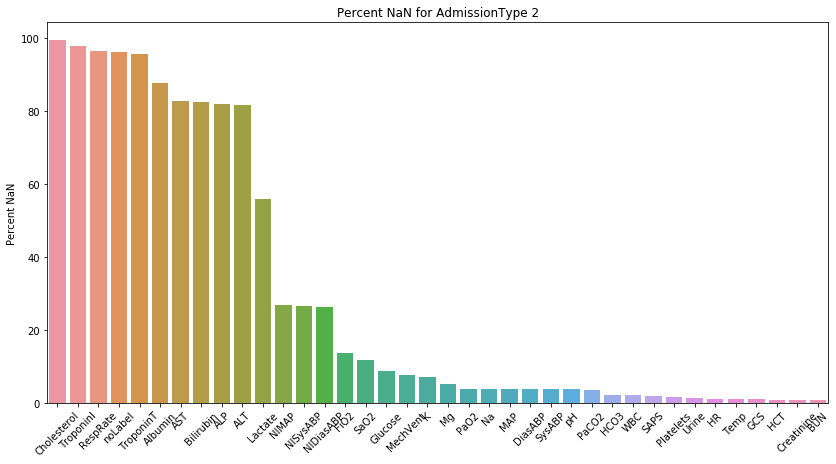

In [12]:
plt.figure(figsize=(14,7))
sns.barplot(AdmissionType2.index, AdmissionType2[0])
plt.title("Percent NaN for AdmissionType 2")
plt.ylabel("Percent NaN")
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 <a list of 38 Text xticklabel objects>)

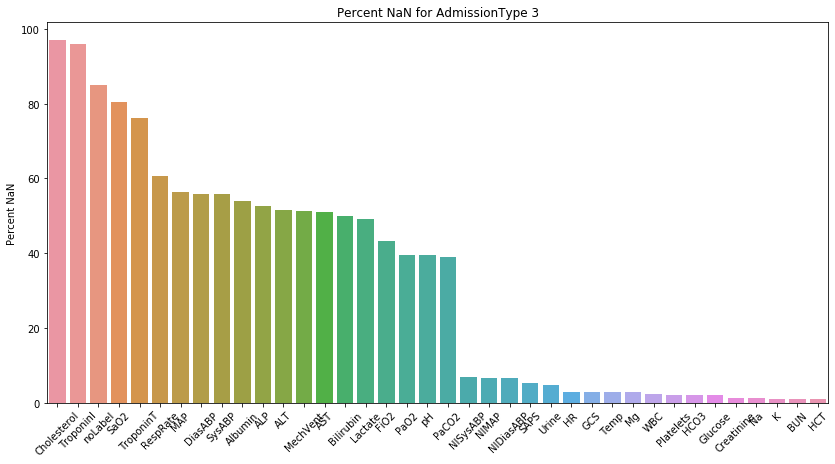

In [13]:
plt.figure(figsize=(14,7))
sns.barplot(AdmissionType3.index, AdmissionType3[0]) 
plt.title("Percent NaN for AdmissionType 3")
plt.ylabel("Percent NaN")
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 <a list of 38 Text xticklabel objects>)

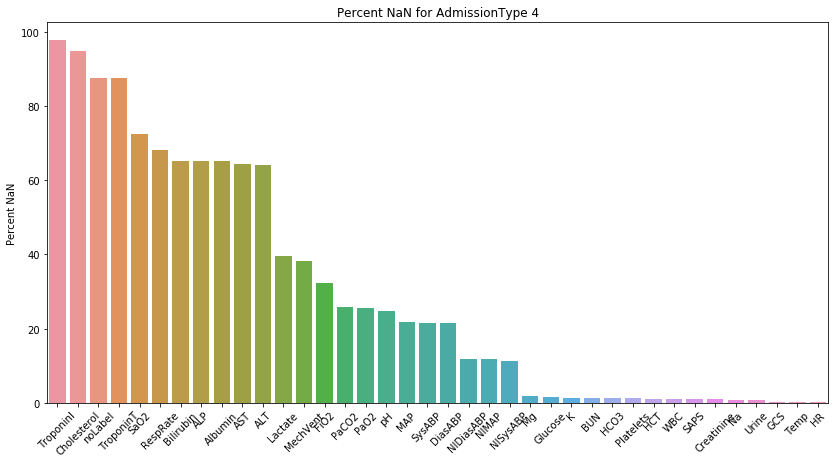

In [14]:
plt.figure(figsize=(14,7))
sns.barplot(AdmissionType4.index, AdmissionType4[0])
plt.title("Percent NaN for AdmissionType 4")
plt.ylabel("Percent NaN")
plt.xticks(rotation=45)

We can see for each `admissionType` there are many variables that have a lot of `NaN`. We can drop the ones over a particular percent, then run a dimention reduction technique. Or we can keep all them, then run dimention reduction. Either way, we may need to fill the `NaN`'s with some value that is not in any of the variable values. This may be easier if we standardize/normalize our data first.

# EDA for Clustering then Splitting Based on Clusters